# New York City Airbnb Market

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [247]:
# upload Dataset
airbnb_review = pd.read_csv("data/airbnb_last_review.csv")
airbnb_price = pd.read_csv("data/airbnb_price.csv")
airbnb_type= pd.read_excel("data/airbnb_room_type.xlsx")

In [248]:
# Explore the data
airbnb_review.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [249]:
airbnb_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    listing_id  25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [250]:
airbnb_review['last_review'].agg(['min', 'max'])

min    April 01 2019
max      May 31 2019
Name: last_review, dtype: object

**Clean airbnb_review Dataset**

In [251]:
# Eliminate space in column names
airbnb_review.columns = airbnb_review.columns.str.strip()

# Eliminate duplicates
airbnb_review = airbnb_review.drop_duplicates(subset=["listing_id", "last_review"])

# Reset index after dropping duplicates
airbnb_review = airbnb_review.reset_index(drop=True)

# Change null values to NaN
airbnb_review['host_name'] = airbnb_review['host_name'].fillna("Not identified")

# Review null values
airbnb_review.isnull().sum()

# Change the data type of the last_review column to datetime
airbnb_review["last_review"] = pd.to_datetime(airbnb_review["last_review"])

**Clean airbnb_price Dataset**

In [252]:
airbnb_price.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [253]:
airbnb_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [254]:
# Eliminate space in column names
airbnb_price.columns = airbnb_price.columns.str.strip()

# Eliminate duplicates
airbnb_price = airbnb_price.drop_duplicates(subset=["listing_id", "price"])

# Reset index after dropping duplicates
airbnb_price = airbnb_price.reset_index(drop=True)

In [255]:
# Remove whitespace and string characters from prices column
airbnb_price["price"] = airbnb_price["price"].str.replace(" dollars", "")

# Convert prices column to numeric datatype
airbnb_price["price"] = pd.to_numeric(airbnb_price["price"])

# Print descriptive statistics for the price column
print(airbnb_price["price"].describe())

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


**Clean airbnb_type Dataset**

In [256]:
airbnb_type.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [257]:
airbnb_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [258]:
# Eliminate space in column names
airbnb_type.columns = airbnb_type.columns.str.strip()

# Eliminate duplicates
airbnb_type = airbnb_type.drop_duplicates(subset=["listing_id", "description"])

# Reset index after dropping duplicates
airbnb_type = airbnb_type.reset_index(drop=True)

# input missing value
airbnb_type['description'] = airbnb_type['description'].fillna("Not identified")

# Change the column room_type
airbnb_type['room_type'] = airbnb_type['room_type'].str.title()

Create a one Dataset

In [259]:
df = pd.merge(airbnb_review, airbnb_price, on = 'listing_id')
df_airbnb = pd.merge(df, airbnb_type, on = 'listing_id')
df_airbnb.reset_index(drop=True, inplace=True)
df_airbnb

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
0,2595,Jennifer,2019-05-21,225,"Manhattan, Midtown",Skylit Midtown Castle,Entire Home/Apt
1,3831,LisaRoxanne,2019-07-05,89,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire Home/Apt
2,5099,Chris,2019-06-22,200,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt
3,5178,Shunichi,2019-06-24,79,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,Private Room
4,5238,Ben,2019-06-09,150,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt
...,...,...,...,...,...,...,...
25204,36425863,Rusaa,2019-07-07,129,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,Private Room
25205,36427429,H Ai,2019-07-07,45,"Queens, Flushing",No.2 with queen size bed,Private Room
25206,36438336,Ben,2019-07-07,235,"Staten Island, Great Kills",Seas The Moment,Private Room
25207,36442252,Blaine,2019-07-07,100,"Bronx, Mott Haven",1B-1B apartment near by Metro,Entire Home/Apt


In [260]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   25209 non-null  int64         
 1   host_name    25209 non-null  object        
 2   last_review  25209 non-null  datetime64[ns]
 3   price        25209 non-null  int64         
 4   nbhood_full  25209 non-null  object        
 5   description  25209 non-null  object        
 6   room_type    25209 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.3+ MB


In [261]:
df_airbnb_final= df_airbnb.copy()

In [262]:
print(df_airbnb_final["price"].describe())

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


In [263]:
# Subset prices for listings costing $0, free_listings
free =df_airbnb_final["price"] == 0

# Update prices by removing all free listings from prices
df_airbnb_final = df_airbnb_final.loc[~free_listings]

# Calculate the average price, avg_price
avg_price = round(df_airbnb_final["price"].mean(), 2)

# Print the average price
print("The average price per night for an Airbnb  in NYC is ${}.".format(avg_price))

The average price per night for an Airbnb  in NYC is $141.82.


Review the  average price for room type

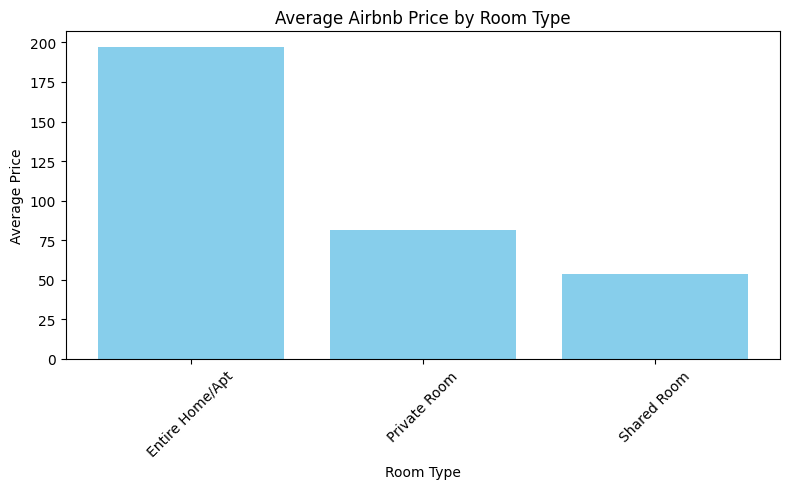

In [264]:
# Average price for room type
avg_price = df_airbnb_final.groupby('room_type')['price'].mean()

# Graphic
plt.figure(figsize=(8,5))
plt.bar(avg_price.index, avg_price.values, color='skyblue')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Airbnb Price by Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [265]:
df_airbnb_final['borough'] = df_airbnb_final['nbhood_full'].str.partition(",")[0]
df_airbnb_final


,listing_id,host_name,last_review,price,nbhood_full,description,room_type,borough
0,2595,Jennifer,2019-05-21,225,"Manhattan, Midtown",Skylit Midtown Castle,Entire Home/Apt,Manhattan
1,3831,LisaRoxanne,2019-07-05,89,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire Home/Apt,Brooklyn
2,5099,Chris,2019-06-22,200,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,Manhattan
3,5178,Shunichi,2019-06-24,79,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,Private Room,Manhattan
4,5238,Ben,2019-06-09,150,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,Manhattan
...,...,...,...,...,...,...,...,...
25204,36425863,Rusaa,2019-07-07,129,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,Private Room,Manhattan
25205,36427429,H Ai,2019-07-07,45,"Queens, Flushing",No.2 with queen size bed,Private Room,Queens
25206,36438336,Ben,2019-07-07,235,"Staten Island, Great Kills",Seas The Moment,Private Room,Staten Island
25207,36442252,Blaine,2019-07-07,100,"Bronx, Mott Haven",1B-1B apartment near by Metro,Entire Home/Apt,Bronx


In [274]:
# Average price for borough
boroughs = df_airbnb_final.groupby("borough")["price"].agg(["sum", "mean", "median", "count"])
boroughs.sort_values("sum", ascending=False)

,sum,mean,median,count
borough,,,,
Manhattan,1899255,184.000678,149.0,10322
Brooklyn,1275855,121.974665,95.0,10460
Queens,320765,92.813947,70.0,3456
Bronx,55231,79.241033,65.0,697
Staten Island,22974,86.044944,71.0,267


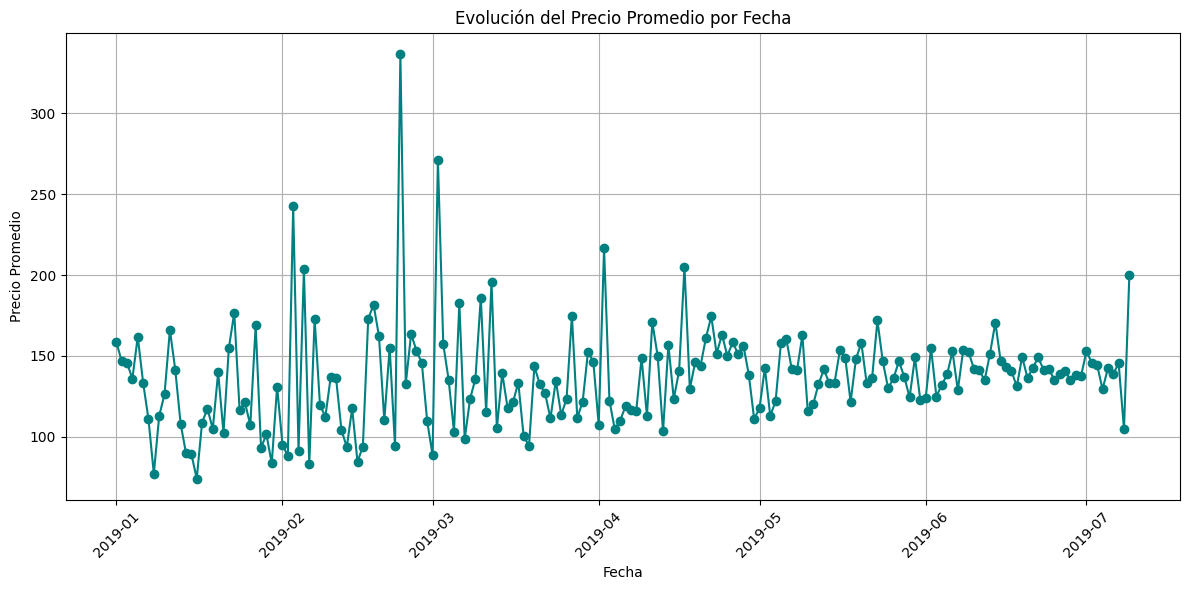

In [276]:
# Line graph
avg_price_by_date = df_airbnb_final.groupby('last_review')['price'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_date.index, avg_price_by_date.values, marker='o', color='teal')
plt.title('Evolución del Precio Promedio por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()